# Testing and Building Models
---


In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
import math
import missingno as ms

## Importing the cleaned data
---

In [2]:
# Reading in the cleaned csvs
ames = pd.read_csv('./datasets/ames_clean.csv')
test = pd.read_csv('./datasets/test_clean.csv')


pd.set_option('display.max_columns', len(ames))  #uncomment this to see the entire output
#pd.reset_option('display.max_rows')   #uncomment this to reset to the truncated output

ames.head(2)

,id,pid,lot_frontage,lot_area,street,alley,land_contour,utilities,overall_qual,overall_cond,year_built,year_remod/add,exterior_1st,condition_artery,condition_feedr,exterior_2nd,condition_posa,condition_posn,condition_rrae,condition_rran,mas_vnr_area,condition_rrnn,exter_qual,exter_cond,bsmt_cond,bsmt_exposure,freshness,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,totbsmtfin_sq_ft,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,total_sq_ft,garage_finish,totfin_sq_ft,garage_cars,bsmtfin_type_alq,bsmt_bath,bsmtfin_type_blq,bsmtfin_type_glq,bsmtfin_type_lwq,bsmtfin_type_rec,garage_area,garage_qual,total_bath,garage_cond,totrooms,wood_deck_sf,open_porch_sf,enclosed_porch_sf,3ssn_porch_sf,screen_porch_sf,misc_feature,misc_val,saleprice,ms_zoning_a_(agr),ms_zoning_c_(all),ms_zoning_fv,ms_zoning_i_(all),ms_zoning_rh,ms_zoning_rl,ms_zoning_rm,lot_shape_ir1,lot_shape_ir2,lot_shape_ir3,lot_shape_reg,lot_config_corner,lot_config_culdsac,lot_config_fr2,lot_config_fr3,wood_deck,open_porch,lot_config_inside,enclosed_porch,land_slope_gtl,3ssn_porch,land_slope_mod,screen_porch,land_slope_sev,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,bldg_type_1fam,bldg_type_2fmcon,bldg_type_duplex,bldg_type_twnhs,bldg_type_twnhse,house_style_1.5fin,house_style_1.5unf,house_style_1story,house_style_2.5fin,house_style_2.5unf,house_style_2story,house_style_sfoyer,house_style_slvl,roof_style_flat,roof_style_gable,roof_style_gambrel,roof_style_hip,roof_style_mansard,roof_style_shed,roof_matl_clytile,roof_matl_compshg,roof_matl_membran,roof_matl_tar&grv,roof_matl_wdshake,roof_matl_wdshngl,mas_vnr_type_0,mas_vnr_type_brkcmn,mas_vnr_type_brkface,mas_vnr_type_stone,foundation_brktil,foundation_cblock,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,bsmt_qual_0,bsmt_qual_ex,bsmt_qual_fa,bsmt_qual_gd,bsmt_qual_po,bsmt_qual_ta,heating_gasa,heating_gasw,heating_grav,heating_othw,heating_wall,central_air_n,central_air_y,electrical_fusea,electrical_fusef,electrical_fusep,electrical_mix,electrical_sbrkr,garage_type_0,garage_type_2types,garage_type_attchd,garage_type_basment,garage_type_builtin,garage_type_carport,garage_type_detchd,paved_drive_n,paved_drive_p,paved_drive_y,fence_0,fence_gdprv,fence_gdwo,fence_mnprv,fence_mnww,sale_type_cod,sale_type_cwd,sale_type_con,sale_type_conld,sale_type_conli,sale_type_conlw,sale_type_new,sale_type_oth,sale_type_wd_
0,109,533352170,0.0,13517,Pave,0,Lvl,AllPub,6,8,1976,2005,HdBoard,0,0,Plywood,0,0,1,0,289.0,0,4,3,3.0,0.0,29,533.0,0.0,192.0,725.0,5,725,754,0,0.0,0.0,2,1,533.0,3,1,4,6,8,0,0.0,1976.0,2204.0,RFn,533.0,2.0,0,0.0,0,1,0,0,475.0,3.0,3.0,0.0,9.0,0,44,0,0,0,0,0,130500,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,43.0,11492,Pave,0,Lvl,AllPub,7,5,1996,1997,VinylSd,0,0,VinylSd,0,0,0,0,132.0,0,4,3,3.0,0.0,1,637.0,0.0,276.0,913.0,5,913,1209,0,1.0,0.0,2,1,637.0,4,1,4,8,8,1,3.0,1997.0,3035.0,RFn,637.0,2.0,0,1.0,0,1,0,0,559.0,3.0,4.0,0.0,12.0,0,74,0,0,0,0,0,220000,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0

## Correlation Testing
---

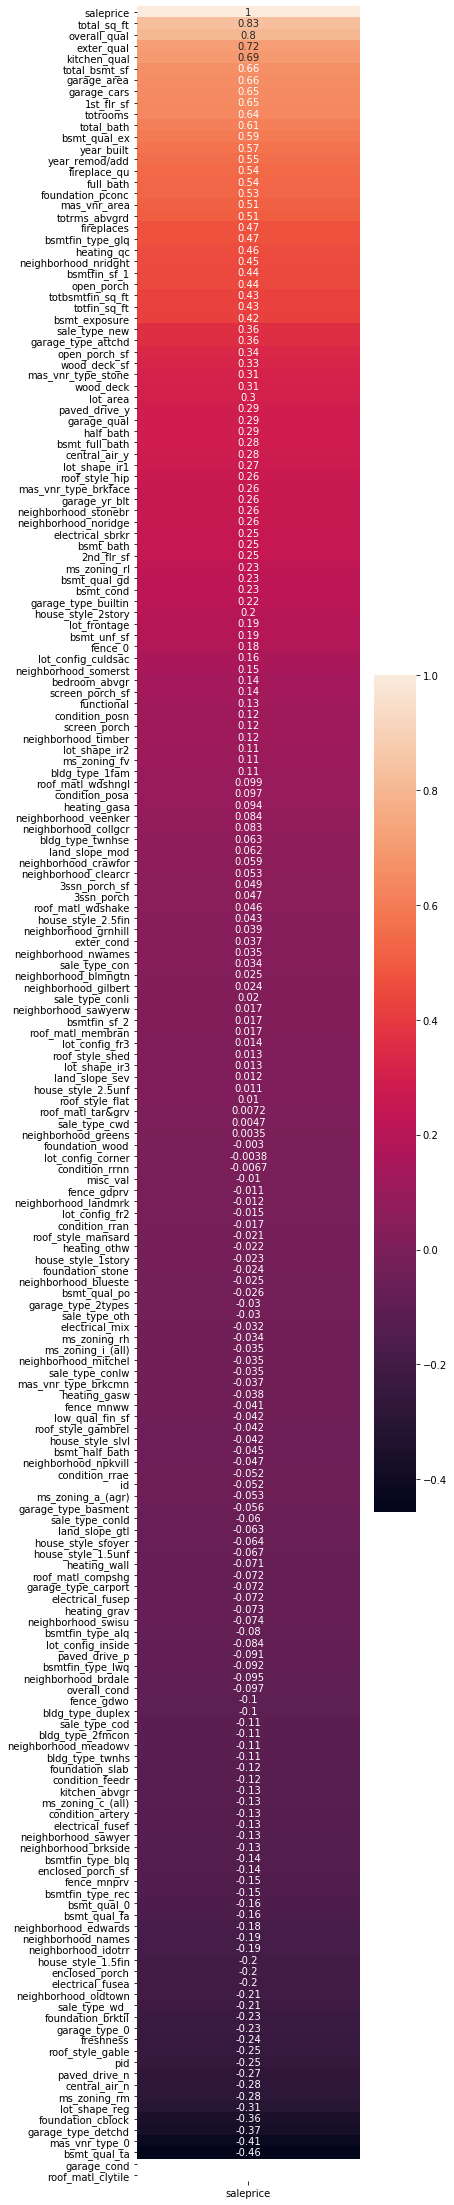

In [3]:
'''Since maximizing slaeprice is the purose of this 
analysis, this will test how all variables are correlated with Sale Price.''' 

corr = ames.corr()
plt.figure(figsize=(5,40))
sns.heatmap(ames.corr()[['saleprice']].sort_values('saleprice', ascending=False), annot=True);

# First Model
---
Starting with a small test of only the strongest correlations above.

In [4]:
#Defining variables
dep = ames['saleprice']
indep = ames[['overall_qual', 'total_sq_ft', 'exter_qual', 'garage_area', 'totrooms']]

In [5]:
# X_train, X_test, y_train, y_test 
indep_train, indep_test, dep_train, dep_test = train_test_split(indep, dep, train_size=.7, random_state=42)

In [6]:
'''This is megafunction.  It does an entire regression and statistic output in one step.  It does do cross 
value score, but at this time I have not been able to get th score out of the function without errors.'''

def megafunction(df, dep_tr, indep_tr, dep_te, indep_te):
    #dep is equal to y and indep is equal to X.
    
    # Scale data
    sc = StandardScaler()
    # Fit and transform.
    indep_tr = sc.fit_transform(indep_tr)
    indep_te = sc.transform(indep_te)
    
    # Instantiate the model.
    linreg = LinearRegression()
    
    #Testing fit
    fit = linreg.fit(indep_tr,dep_tr)
        
    # coefficients
    coef = linreg.coef_
    
    # Intercept
    inter = linreg.intercept_
    
    # Independent predictions
    predict_tr = linreg.predict(indep_tr)
    predict_te = linreg.predict(indep_te)
    
    # Match coefficients to variables
    var_coef = pd.DataFrame(list(zip(indep_tr, linreg.coef_)), columns=['Indy Variable', 'Coefficient'])
    
   # Plot the model
    plt.figure(figsize=(5,5));

    # Generate a scatterplot of predicted values versus actual values.
    plt.scatter(predict_tr, dep_tr, s=5, color='green', alpha = 0.7);
    plt.plot([0, np.max(dep)],  # Plot a line.
         [0, np.max(dep)],
         color = 'red');
    plt.xlabel("Predicted Values", fontsize = 10)  # Tweak title and axis labels.
    plt.ylabel("Actual Values", fontsize = 10)
    plt.title('Predicted Values vs. Actual Values', fontsize = 18);

    # Find EVS, MSE, RMSE & MAE
    evs_tr = metrics.explained_variance_score(dep_tr, predict_tr)
    evs_te = metrics.explained_variance_score(dep_te, predict_te)
    mse_tr = metrics.mean_squared_error(dep_tr, predict_tr)
    mse_te = metrics.mean_squared_error(dep_te, predict_te)
    rmse_tr = math.sqrt(mse_tr)
    rmse_te = math.sqrt(mse_te)
    mae_tr = metrics.mean_absolute_error(dep_tr, predict_tr)
    mae_te = metrics.mean_absolute_error(dep_te, predict_te)
    mean_tr = [dep.mean()]*len(dep_tr)
    mean_te = [dep.mean()]*len(dep_te)
    mse_baseline = mean_squared_error(dep_tr, mean_tr)
    
    
    # Find R-Square(for future versions)
    r_sq_tr = metrics.r2_score(dep_tr, predict_tr)
    r_sq_te = metrics.r2_score(dep_te, predict_te)
    
    # R-Squared Adjusted
    r_sqa_tr = 1 - (1-r_sq_tr)*(len(dep_tr) - 1)/(len(dep_tr) - indep_tr.shape[1] - 1)
    r_sqa_te = 1 - (1-r_sq_te)*(len(dep_te) - 1)/(len(dep_te) - indep_te.shape[1] - 1)
    
    #Cross Value Score
    CVS = cross_val_score(linreg, indep_tr, dep_tr, cv=5)  
    MCVS = cross_val_score(linreg, indep_tr, dep_tr, cv=5).mean  
    
    
    # Explained variance
    #print([[var_coef]])
    print(f"Intercept:        {inter:,.2f}")
    print(" ")
    print(f"Mean Squared Error Baseline: {mse_baseline:,.2f}")
    print(" ")
    print('TRAINING DATA')
    print(f"Mean Squared Error:          {mse_tr:,.2f}")
    print(f"Root Mean Squared Error:     {rmse_tr:,.2f}")
    print(f"Mean Absolute Error:         {mae_tr:,.2f}")
    print(f"Explained Variance:          {evs_tr:,.6f}")
    print(f"R-Squared:                   {r_sq_tr:,.6f}")
    print(f"Adjusted R-Squared:          {r_sqa_tr:,.6f}")
    print('TEST DATA')
    print(f"Root Mean Squared Error:     {rmse_te:,.2f}")
    print(f"Mean Absolute Error:         {mae_te:,.2f}")
    print(f"Explained Variance:          {evs_te:,.6f}")
    print(f"R-Squared:                   {r_sq_te:,.6f}")
    print(f"Adjusted R-Squared:          {r_sqa_te:,.6f}")
    #print(f"Cross Val Score:             {CVS:,.6f}")   #I cannot figure out how to get these variables print.
    #print(f"Cross Val Mean:              {MCVS:,.6f}")  #without an error.  Even if I try to change the type.
    
    return linreg

Intercept:        181,099.03
 
Mean Squared Error Baseline: 6,473,526,810.13
 
TRAINING DATA
Mean Squared Error:          1,056,748,170.92
Root Mean Squared Error:     32,507.66
Mean Absolute Error:         23,580.23
Explained Variance:          0.836757
R-Squared:                   0.836757
Adjusted R-Squared:          0.836185
TEST DATA
Root Mean Squared Error:     32,146.22
Mean Absolute Error:         23,155.90
Explained Variance:          0.821071
R-Squared:                   0.820417
Adjusted R-Squared:          0.818943


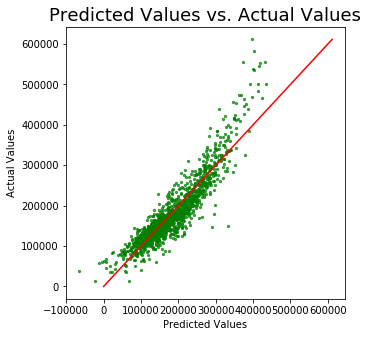

In [7]:
# Running the regression and generating the output
linreg = megafunction(ames, dep_train, indep_train, dep_test, indep_test)

In [8]:
#Rerunning the model in Stats Models for the far superior output.
indep_train = sm.add_constant(indep)
model = sm.OLS(dep, indep).fit()
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              9537.
Date:                Fri, 29 May 2020   Prob (F-statistic):                        0.00
Time:                        21:18:52   Log-Likelihood:                         -24613.
No. Observations:                2048   AIC:                                  4.924e+04
Df Residuals:                    2043   BIC:                                  4.926e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
overall_qual  1.538e+04   1066.710     14.416      0.000    1.33e+04    1.75e+04
total_sq_ft     52.1502      2.035     25.626      0.000      48.159      56.141
exter_qual   -1.172e+04   1784.499     -6.569      0.000   -1.52e+04   -8222.005
garage_area     74.4705      5.268     14.136      0.000      64.139      84.802
totrooms     -4144.8241    559.772     -7.404      0.000   -5242.607   -3047.041
==============================================================================
Omnibus:                      671.702   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4025.839
Skew:                           1.411   Prob(JB):                         0.00
Kurtosis:                       9.262   Cond. No.                     5.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis of Model 1
---
For a first attempt this model performed pretty well. After the first run I removed Kitchen Quality and Garage Cars because their p-values were above 0.05.  Additionaly, I am pretty sure Garage Cars had multicollinearity with Garage Area.  Removing these variables and rerunning the model did a good of improving fit.  Overall, the final model's statistics indicate very normally distributed data with low Omnibus and Jarque-Bera results.  However, the excessively high Condition Number indictates there is a very high chance of multicollinearity in the model.  

The model itself, qualitiatively is rather odd.  While Overall Quality has an extremely positive effect, 15,380, on Sale Price, Exterior Quality had a very negative coefficient, -11,720.  Considering that these two variables probably have some interaction, it is hard to descrie how they could be going in such opposite directions.

Of note, this is the model that I submitted to Kaggle.  In order to do so I had do some special engineering to mega function, which I undid to make this sheet submission worthy.

# Second Model
---
For this model I wanted to test all of the variables that showed a correlation above .5.

**First Attempt** - I used every variable in the heatmap below.

**Second Attempt** - For the next step, I removed the variables year_built, year_remod/add, garage_cars, totrooms due to high p-values.

**Third Attempt** - Similarly, I removed 1st_flr_sf, exter_qual, kitchen_qual for lack of statistaical signifigance.

**Final Attempt** - All variables proved significant.

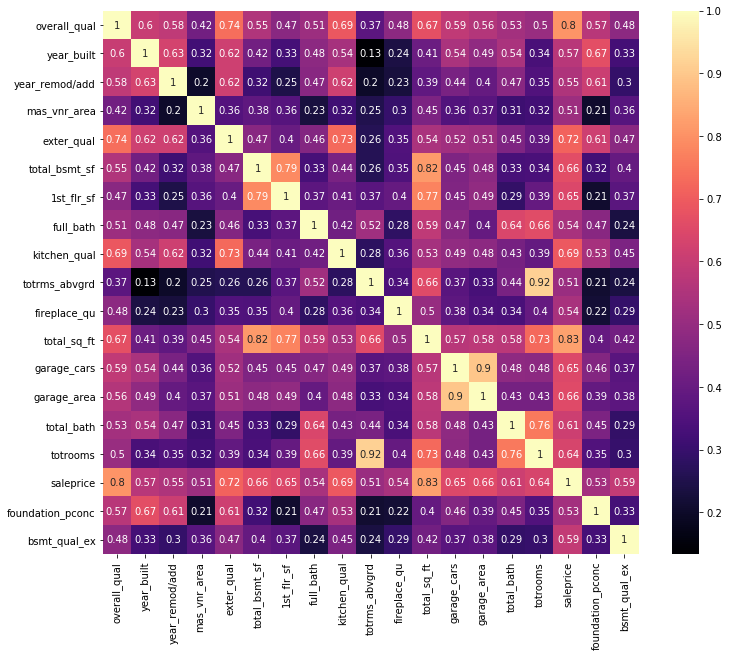

In [9]:
# Building a heat map of variables that have correlation above .5 with sales price.
top_corr = ames.corr()
top_corr_features = top_corr.index[abs(top_corr["saleprice"])>0.5]
plt.figure(figsize=(12,10))
g = sns.heatmap(ames[top_corr_features].corr(),annot=True,cmap="magma")

In [10]:
# This model will train the variables that show the most promise on the entire train set based on the heat map above.
dep1 = ames['saleprice']
indep1 = ames[['overall_qual', 
               'mas_vnr_area', 
               'total_bsmt_sf', 
               'full_bath', 
               'totrms_abvgrd', 
               'total_sq_ft', 
               'garage_area', 
               'total_bath', 
               'foundation_pconc', 
               'bsmt_qual_ex']]
#Train Test Split
indep_train1, indep_test1, dep_train1, dep_test1 = train_test_split(indep1, dep1, train_size=.8, random_state=42)

Intercept:        181,131.77
 
Mean Squared Error Baseline: 6,371,965,925.88
 
TRAINING DATA
Mean Squared Error:          913,840,008.12
Root Mean Squared Error:     30,229.79
Mean Absolute Error:         21,297.08
Explained Variance:          0.856583
R-Squared:                   0.856583
Adjusted R-Squared:          0.855702
TEST DATA
Root Mean Squared Error:     29,087.11
Mean Absolute Error:         20,884.23
Explained Variance:          0.856370
R-Squared:                   0.854133
Adjusted R-Squared:          0.850477


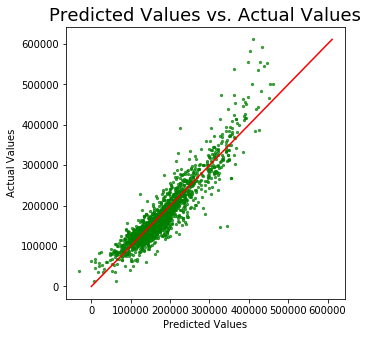

In [11]:
# Running the model through mega function.
predict_te = megafunction(ames, dep_train1, indep_train1, dep_test1, indep_test1)

In [12]:
# Rerunning the model through Stats Models.
indep_train = sm.add_constant(indep1)
model = sm.OLS(dep1, indep1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              7928.
Date:                Fri, 29 May 2020   Prob (F-statistic):                        0.00
Time:                        21:18:56   Log-Likelihood:                         -24107.
No. Observations:                2048   AIC:                                  4.823e+04
Df Residuals:                    2038   BIC:                                  4.829e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
overall_qual      9159.4711    618.746     14.803      0.000    7946.030    1.04e+04
mas_vnr_area        43.3941      4.625      9.383      0.000      34.324      52.464
total_bsmt_sf      -35.2786      3.635     -9.705      0.000     -42.407     -28.150
full_bath        -9903.5891   1876.183     -5.279      0.000   -1.36e+04   -6224.154
totrms_abvgrd    -7518.3104    660.588    -11.381      0.000   -8813.808   -6222.813
total_sq_ft         68.5658      2.916     23.517      0.000      62.848      74.284
garage_area         43.0380      4.205     10.235      0.000      34.791      51.284
total_bath        6449.7964   1069.853      6.029      0.000    4351.676    8547.917
foundation_pconc  1.776e+04   1722.514     10.309      0.000    1.44e+04    2.11e+04
bsmt_qual_ex       6.03e+04   2778.984     21.698      0.000    5.48e+04    6.57e+04
==============================================================================
Omnibus:                      478.304   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4408.969
Skew:                           0.829   Prob(JB):                         0.00
Kurtosis:                       9.994   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis of Previous Model
---
With each iteration of the model removing variable there was a trend of improving the r squared but undermining the Root Mean Squared Error.  The final model acheived an incredibly high r squared value.  Like the previous model, the distribution is very normal and there are strong signs of multicollinearity issues.  Kurtosis is a bit high but not too concerning.

Simliar to the other the model the coefficients build a model that is a little counter intuitive.  In this case, for some reason this case Total Basement Sq Ft (-35.2), Total Rooms Above Grade (-7,518.3) and Full Baths (-9903.6) are negative. It seems odd that the sale price of a home would be penalized for those items.  On the other hand, having a cast concrete adds 17,1760 Dollars to the Sale Price.  Granted Iowa is in Tornado Alley and when a tornado comes you want a really good basement.  The same can be said for having a basement in the excellent quality range.


# 3rd Model
---

For the third model, I wanted to test the effect of neighborhood location on sale price.

In [13]:
# Defining independent and dependent variables.
dep2 = ames['saleprice']
indep2 = ames[['neighborhood_blmngtn', 
               'neighborhood_blueste', 
               'neighborhood_brdale', 
               'neighborhood_brkside', 
               'neighborhood_clearcr', 
               'neighborhood_collgcr', 
               'neighborhood_crawfor', 
               'neighborhood_edwards', 
               'neighborhood_gilbert', 
               'neighborhood_greens', 
               'neighborhood_grnhill', 
               'neighborhood_idotrr', 
               'neighborhood_landmrk', 
               'neighborhood_meadowv', 
               'neighborhood_mitchel', 
               'neighborhood_names', 
               'neighborhood_npkvill', 
               'neighborhood_nwames', 
               'neighborhood_noridge', 
               'neighborhood_nridght', 
               'neighborhood_oldtown',
               'neighborhood_swisu',
               'neighborhood_sawyer',
               'neighborhood_sawyerw',
               'neighborhood_somerst',
               'neighborhood_stonebr',
               'neighborhood_timber',
               'neighborhood_veenker']]
indep_train2, indep_test2, dep_train2, dep_test2 = train_test_split(indep2, dep2, train_size=.8, random_state=42)

Intercept:        181,173.21
 
Mean Squared Error Baseline: 6,371,965,925.88
 
TRAINING DATA
Mean Squared Error:          2,646,075,819.94
Root Mean Squared Error:     51,440.02
Mean Absolute Error:         34,841.59
Explained Variance:          0.584729
R-Squared:                   0.584728
Adjusted R-Squared:          0.577502
TEST DATA
Root Mean Squared Error:     51,996.46
Mean Absolute Error:         36,163.16
Explained Variance:          0.535257
R-Squared:                   0.533875
Adjusted R-Squared:          0.499619


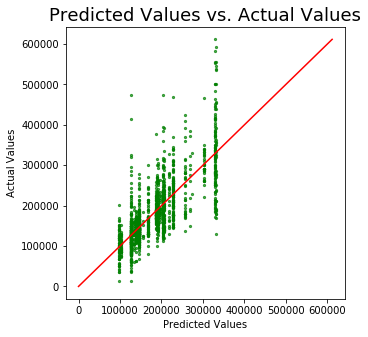

In [14]:
# Running the model.
predict_te = megafunction(ames, dep_train2, indep_train2, dep_test2, indep_test2)

In [15]:
indep_train = sm.add_constant(indep_test2)
model = sm.OLS(dep_test2, indep_test2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     22.37
Date:                Fri, 29 May 2020   Prob (F-statistic):           1.28e-58
Time:                        21:18:56   Log-Likelihood:                -5011.4
No. Observations:                 410   AIC:                         1.007e+04
Df Residuals:                     385   BIC:                         1.017e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
neighborhood_blmngtn  2.115e+05   2.93e+04      7.212      0.000    1.54e+05    2.69e+05
neighborhood_blueste  3.618e-11   3.82e-12      9.461      0.000    2.87e-11    4.37e-11
neighborhood_brdale   1.048e+05   2.54e+04      4.129      0.000    5.49e+04    1.55e+05
neighborhood_brkside  1.367e+05   1.92e+04      7.119      0.000    9.89e+04    1.74e+05
neighborhood_clearcr  2.149e+05   2.27e+04      9.461      0.000     1.7e+05     2.6e+05
neighborhood_collgcr  1.961e+05   8464.875     23.161      0.000    1.79e+05    2.13e+05
neighborhood_crawfor  2.263e+05   1.41e+04     16.068      0.000    1.99e+05    2.54e+05
neighborhood_edwards  1.341e+05   9431.327     14.216      0.000    1.16e+05    1.53e+05
neighborhood_gilbert  1.925e+05   1.06e+04     18.178      0.000    1.72e+05    2.13e+05
neighborhood_greens     1.9e+05   5.08e+04      3.741      0.000    9.01e+04     2.9e+05
neighborhood_grnhill  3.314e-12    2.6e-13     12.734      0.000     2.8e-12    3.83e-12
neighborhood_idotrr   8.315e+04   1.69e+04      4.912      0.000    4.99e+04    1.16e+05
neighborhood_landmrk  1.716e-12      7e-14     24.514      0.000    1.58e-12    1.85e-12
neighborhood_meadowv   8.95e+04   2.54e+04      3.524      0.000    3.96e+04    1.39e+05
neighborhood_mitchel  1.828e+05   1.61e+04     11.383      0.000    1.51e+05    2.14e+05
neighborhood_names    1.467e+05   5985.570     24.514      0.000    1.35e+05    1.58e+05
neighborhood_npkvill  1.446e+05   2.54e+04      5.695      0.000    9.47e+04    1.95e+05
neighborhood_nwames   2.036e+05   1.02e+04     20.044      0.000    1.84e+05    2.24e+05
neighborhood_noridge  3.358e+05   1.27e+04     26.443      0.000    3.11e+05    3.61e+05
neighborhood_nridght  2.969e+05   1.08e+04     27.415      0.000    2.76e+05    3.18e+05
neighborhood_oldtown  1.181e+05   9272.806     12.734      0.000    9.99e+04    1.36e+05
neighborhood_swisu    1.418e+05   2.54e+04      5.582      0.000    9.18e+04    1.92e+05
neighborhood_sawyer   1.339e+05   1.04e+04     12.916      0.000    1.14e+05    1.54e+05
neighborhood_sawyerw   1.81e+05   1.14e+04     15.939      0.000    1.59e+05    2.03e+05
neighborhood_somerst  2.181e+05   1.06e+04     20.598      0.000    1.97e+05    2.39e+05
neighborhood_stonebr  3.256e+05   2.27e+04     14.334      0.000    2.81e+05     3.7e+05
neighborhood_timber    2.08e+05   1.31e+04     15.858      0.000    1.82e+05    2.34e+05
neighborhood_veenker  2.261e+05   2.07e+04     10.905      0.000    1.85e+05    2.67e+05
==============================================================================
Omnibus:                       63.783   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.044
Skew:                           0.711   Prob(JB):                     3.28e-42
Kurtosis

## Model Analysis
---
This model only had to be run once because every variable proved to be significant.  Despite having a lower r squared score of .58, this model has good omnibus, Jarque-Bera, and f-statistic probablilities with all of them at or very near zero.  Skew is minimal and there is virtually no Kurtosis.  However, condition number once again indicates a very high chance of multicollinearity.

The coefficients are substantially large, but that makes sense since these features are all dummies.  It performed as expected with the 3 "fanciest" neighborhoods sporting the largest coeffiecints.  Northridge, Stone Brook, and Northridge Heights.

# 4h Model
---
**1st Pass** - Removed Garage Condition for lack of statistical signifigance.

**2nd Pass** - Removed Garage Quality, External Quality, Basement Condition, and Heating QC

**3rd Pass** -
For this model I wanted to take a look at the subjective variables in the data set.  These are variables that are usually coded in a Likert Scale (e.g. Poor - Excellent).  So for all of effort that people go through to rate these various items, I think it would be interesting to see if they actually allign with sale prices.

In [16]:
#Defining varaiables
dep1 = ames['saleprice']
indep1 = ames[['overall_qual', 
               'overall_cond',  
               'kitchen_qual', 
               'functional', 
               ]]

#Train, test, split
indep_train1, indep_test1, dep_train1, dep_test1 = train_test_split(indep1, dep1, train_size=.8, random_state=42)

Intercept:        181,131.77
 
Mean Squared Error Baseline: 6,371,965,925.88
 
TRAINING DATA
Mean Squared Error:          1,982,320,144.17
Root Mean Squared Error:     44,523.25
Mean Absolute Error:         32,223.11
Explained Variance:          0.688897
R-Squared:                   0.688897
Adjusted R-Squared:          0.688135
TEST DATA
Root Mean Squared Error:     43,860.79
Mean Absolute Error:         31,888.86
Explained Variance:          0.668937
R-Squared:                   0.668329
Adjusted R-Squared:          0.665053


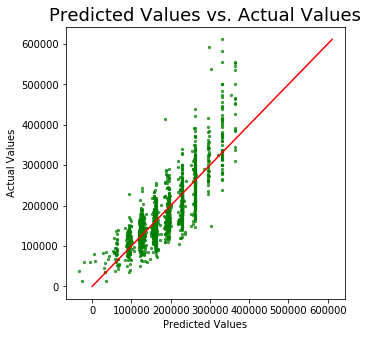

In [17]:
# Running the model
predict_te = megafunction(ames, dep_train1, indep_train1, dep_test1, indep_test1)

In [18]:
# Running the model through Stats Models for the output.
indep_train = sm.add_constant(indep_test1)
model = sm.OLS(dep_test1, indep_test1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              1843.
Date:                Fri, 29 May 2020   Prob (F-statistic):                   9.70e-259
Time:                        21:18:57   Log-Likelihood:                         -4975.9
No. Observations:                 410   AIC:                                      9960.
Df Residuals:                     406   BIC:                                      9976.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
overall_qual  3.567e+04   2307.917     15.456      0.000    3.11e+04    4.02e+04
overall_cond -3819.1849   2094.552     -1.823      0.069   -7936.705     298.336
kitchen_qual  2.428e+04   4385.723      5.535      0.000    1.57e+04    3.29e+04
functional   -1.292e+04   2091.647     -6.179      0.000    -1.7e+04   -8812.381
==============================================================================
Omnibus:                       92.495   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.765
Skew:                           0.951   Prob(JB):                     9.20e-78
Kurtosis:                       7.142   Cond. No.                         25.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Analysis
---
This is one of those cases where you start out with a lot of varaibles and through several iterations of the model only end up with a few left.  However, the result is a very respectable r squared score despite the incredibly subjective nature of these features and all of the other stats look show no cause for concern either.  Even multicollinearity is very low.

The most surpising result is that improving the Overall Condtion actually hurts the value of a home in this model by 3,819 Dollars per Grade.  The kitchen reigns supreme with improves in quallity grade are worth 24, 280 Dollars each.  

**One final observation**  Strangely all four models had nearly identical intercepts of around 181,000 Dollars with barely a 100 dollar spread between them.  